In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
df = pd.read_csv(r'prodata_refined.csv')

In [3]:
#consider stewie2k
df[df['Player'] == 'Stewie2k']

,Team,Player,Game,Mouse,Mouse HZ,DPI,Sensitivity,eDPI,Monitor,Monitor HZ,GPU,Resolution,Aspect Ratio,Mousepad,Keyboard,Headset
2,EG (S),Stewie2k,Counter Strike: Global Offensive,Logitech G Pro X Superlight Black,"1,000",400,2.00,800,BenQ XL2546K,360.0,RTX 2080 Super,1024x768,4:3,SteelSeries QcK Heavy,Logitech G512,HyperX Cloud II
423,EG (S),Stewie2k,VALORANT,Logitech G Pro X Superlight Black,"1,000",400,0.61,244,Alienware AW2521H,360.0,RTX 2080 Ti,1920x1080,16:9,SteelSeries QcK Heavy,Logitech G512,HyperX Cloud II


Correlation:  -0.51
Correlation:  -0.16
Correlation:  0.05


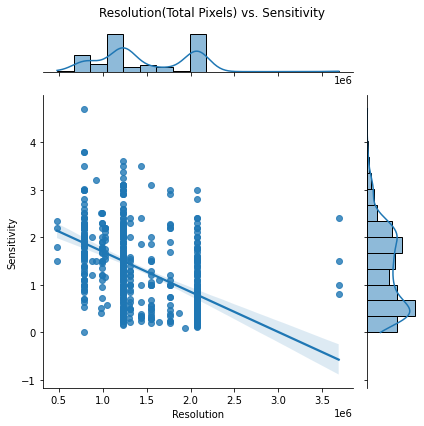

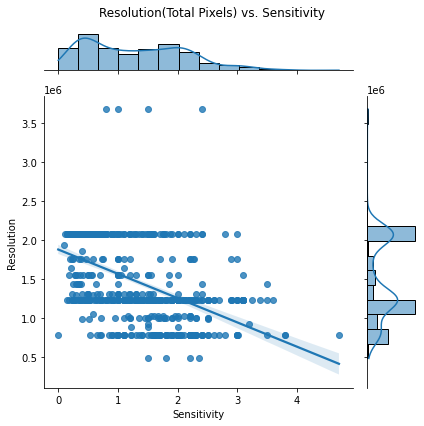

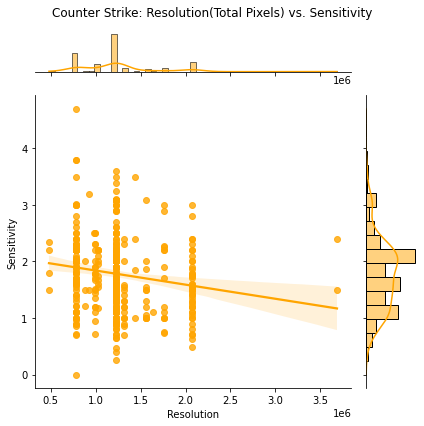

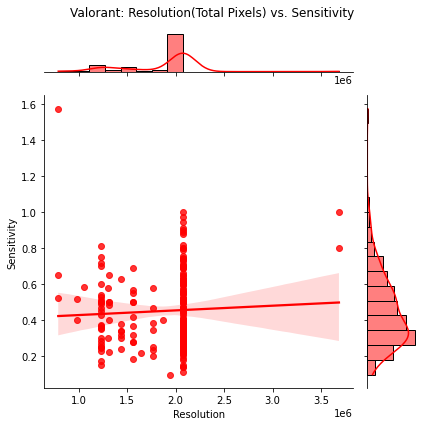

In [4]:
#analyzing trends
pix = []
for i in df['Resolution']:
    r = i.split('x')
    num1 = float(r[0])
    num2 = float(r[1])
    asp = (num1*num2)
    pix.append(asp)
df['Resolution'] = pix

#plot 1
g1 = sns.jointplot(x=df['Resolution'], y=df['Sensitivity'], kind = 'reg')
g1.fig.suptitle('Resolution(Total Pixels) vs. Sensitivity')
g1.fig.tight_layout()
print('Correlation: ',round(df['Resolution'].corr(df['Sensitivity']),2))

#plot 4 - Is sensitivity a good predictor for Resolution? No...
g4 = sns.jointplot(x=df['Sensitivity'], y=df['Resolution'], kind = 'reg')
g4.fig.suptitle('Resolution(Total Pixels) vs. Sensitivity')
g4.fig.tight_layout()

#plot 2
cs = df.drop(df[df['Game'] != 'Counter Strike: Global Offensive'].index)
g2=sns.jointplot(x=cs['Resolution'],y=cs['Sensitivity'],kind = 'reg',color = 'orange')
#g2.fig.title('Counter Strike')
g2.fig.suptitle('Counter Strike: Resolution(Total Pixels) vs. Sensitivity')
g2.fig.tight_layout()
print('Correlation: ',round(cs['Resolution'].corr(cs['Sensitivity']),2))

#plot3
val = df.drop(df[df['Game'] != 'VALORANT'].index)
g3=sns.jointplot(x=val['Resolution'],y=val['Sensitivity'],kind = 'reg',color = 'red')
#g2.fig.title('Counter Strike')
g3.fig.suptitle('Valorant: Resolution(Total Pixels) vs. Sensitivity')
g3.fig.tight_layout()
print('Correlation: ',round(val['Resolution'].corr(val['Sensitivity']),2))

Correlation:  0.1


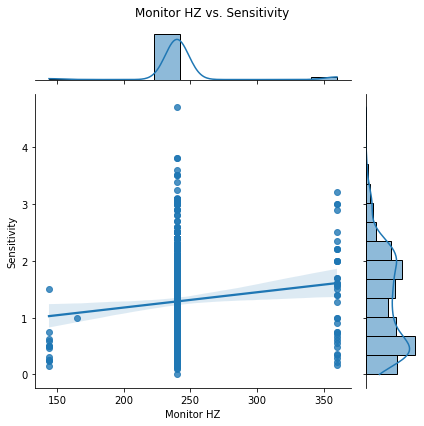

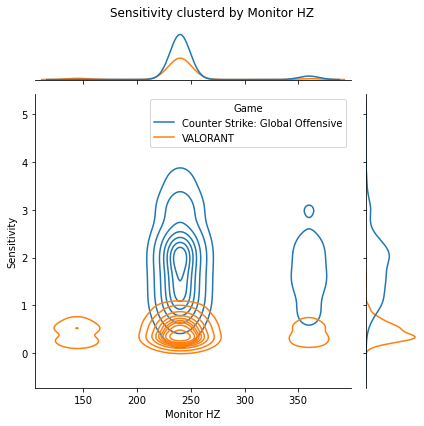

In [5]:
#jointplots cannot exist in the same fig
g2=sns.jointplot(x=df['Monitor HZ'], y=df['Sensitivity'], kind = 'reg')
g2.fig.suptitle('Monitor HZ vs. Sensitivity')
g2.fig.tight_layout()


g3=sns.jointplot(x=df['Monitor HZ'], y=df['Sensitivity'],hue=df['Game'],kind = 'kde')
g3.fig.suptitle('Sensitivity clusterd by Monitor HZ')
g3.fig.tight_layout()
print('Correlation: ',round(df['Monitor HZ'].corr(df['Sensitivity']),2))


In [6]:
#how could we model what a regular consumer looks like? - treat a customer like a null value that needs to be filled.
#constraints - gear that the pros use can cost $1000+, assume consumer has a budget of $1000 or less.

df = pd.read_csv(r'prodata_refined.csv')

#mouse
mouse = df.groupby(['Mouse'])
m= pd.DataFrame(mouse['Mouse'].count())
m.rename(columns = {'Mouse':'In Use'},inplace = True)
print(m[m['In Use'] == m['In Use'].median()])


#Monitor
mon = df.groupby(['Monitor'])
mon= pd.DataFrame(mon['Monitor'].count())
mon.rename(columns = {'Monitor':'In Use'},inplace = True)
print(mon[mon['In Use'] == mon['In Use'].median()])

#Monitor HZ, Resolution and Aspect Ratio
monhz = df.groupby(['Monitor HZ'])
monhz= pd.DataFrame(monhz['Monitor HZ'].count())
monhz.rename(columns = {'Monitor HZ':'In Use'},inplace = True)
print(monhz)

#GPU
gpu = df.groupby(['GPU'])
gpu= pd.DataFrame(gpu['GPU'].count())
gpu.rename(columns = {'GPU':'In Use'},inplace = True)
print(gpu[gpu['In Use'] == gpu['In Use'].min()])

#mouse pad
mopd = df.groupby(['Mousepad'])
mopd= pd.DataFrame(mopd['Mousepad'].count())
mopd.rename(columns = {'Mousepad':'In Use'},inplace = True)
print(mopd[mopd['In Use'] == mopd['In Use'].median()])

#keyboard
kb = df.groupby(['Keyboard'])
kb= pd.DataFrame(kb['Keyboard'].count())
kb.rename(columns = {'Keyboard':'In Use'},inplace = True)
print(kb[kb['In Use'] == kb['In Use'].median()])

#Headset
hs = df.groupby(['Headset'])
hs= pd.DataFrame(hs['Headset'].count())
hs.rename(columns = {'Headset':'In Use'},inplace = True)
print(hs[hs['In Use'] == hs['In Use'].median()])

#important to note that pro gear is overkill for valorant and csgo.
consumer = pd.DataFrame({
    'Mouse': 'SteelSeries Rival 300',
    'Monitor': 'BenQ XL2540K',
    'Monitor HZ':240,
    'Resolution': '1920x1080',
    'Aspect Ratio':'16:9' ,
    'GPU':'GTX 1650'
    
},index = ['Consumer'])
consumer

                           In Use
Mouse                            
HyperX Pulsefire Haste          2
Logitech G Pro Wired            2
Logitech G100s Custom           2
Logitech MX518                  2
Razer Viper V2 Pro White        2
SteelSeries Rival 300           2
VAXEE OUTSET AX Funspark        2
VAXEE ZYGEN NP-01S Glossy       2
Xtrfy M42                       2
ZOWIE EC2 White                 2
Zowie EC1-B                     2
Zowie S1 Divina Edition         2
Zowie ZA11                      2
                                 In Use
Monitor                                
AOC AGON AG241QG                      2
AOC G2460PF                           2
ASUS ROG Strix XG248Q                 2
ASUS ROG XG258Q                       2
Alienware AW2721D                     2
BenQ XL2430T                          2
BenQ XL2540K                          2
BenQ XL2546 Divina Pink Edition       2
OMEN by HP 24.5"                      2
Samsung Odyssey G7                    2
          

,Mouse,Monitor,Monitor HZ,Resolution,Aspect Ratio,GPU
Consumer,SteelSeries Rival 300,BenQ XL2540K,240,1920x1080,16:9,GTX 1650


In [7]:
#experiment
consumers = pd.DataFrame({
    'Consumer': ['Budget','Streamer','Aspiring CSGO Pro','Aspiring Valorant Pro'],
    'Mouse': ['SteelSeries Rival 300','Logitech G100s Custom','SteelSeries Rival 300','SteelSeries Rival 300'],
    'Monitor': ['BenQ XL2540K','Alienware AW2721D','BenQ XL2540','BenQ XL2546K'],
    'Monitor HZ':[240,360,240,240],
    'Resolution': ['1920x1080','2560x1440','1280x960','1920x1080'],
    'Aspect Ratio':['16:9','16:9','4:3','16:9'] ,
    'GPU':['GTX 1650','RTX 3090 Ti','GTX 1080 Ti','RTX 3060 Ti']
    
},index = None)
consumers

,Consumer,Mouse,Monitor,Monitor HZ,Resolution,Aspect Ratio,GPU
0,Budget,SteelSeries Rival 300,BenQ XL2540K,240,1920x1080,16:9,GTX 1650
1,Streamer,Logitech G100s Custom,Alienware AW2721D,360,2560x1440,16:9,RTX 3090 Ti
2,Aspiring CSGO Pro,SteelSeries Rival 300,BenQ XL2540,240,1280x960,4:3,GTX 1080 Ti
3,Aspiring Valorant Pro,SteelSeries Rival 300,BenQ XL2546K,240,1920x1080,16:9,RTX 3060 Ti
